In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

In [16]:
dataset = pd.read_csv('D:\Semester\SEM 4\Emotion_features.csv')

In [17]:
dataset.head()

,id,song_name,class,label,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_std,chroma_stft_var,...,zcr_var,harm_mean,harm_std,harm_var,perc_mean,perc_std,perc_var,frame_mean,frame_std,frame_var
0,1,30 seconds to Mars - Night of the Hunter.mp3,relax,3,117.453835,139925,1283.715596,0.422269,0.293326,0.086040,...,0.007792,0.000001,0.131658,0.017334,0.000142,0.095362,0.009094,4.221388,1.601396,2.564469
1,2,Absolutely - Story of A Girl.mp3,sad,1,129.199219,159877,1268.865079,0.425321,0.289704,0.083929,...,0.008534,-0.000003,0.169204,0.028630,0.000006,0.099145,0.009830,3.246150,1.885735,3.555996
2,3,Ace - Futureland.mp3,happy,2,99.384014,121594,1253.546392,0.487377,0.268670,0.072184,...,0.006199,0.000019,0.206916,0.042814,-0.000077,0.115425,0.013323,3.989188,1.766115,3.119163
3,4,Alan Walker - Faded.mp3,sad,1,89.102909,113611,1291.034091,0.292934,0.295695,0.087435,...,0.002483,-0.000020,0.184177,0.033921,-0.000003,0.055471,0.003077,3.423782,1.922333,3.695364
4,5,Alan Walker - Force [Instrumental].mp3,relax,3,198.768029,252770,1404.277778,0.286669,0.300049,0.090029,...,0.002977,0.000014,0.147811,0.021848,0.000307,0.048204,0.002324,9.637442,7.344525,53.942050


1 - Sad       
2 - Happy      
3 - Relax     
        4 - Angry 

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 58 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   75 non-null     int64  
 1   song_name            75 non-null     object 
 2   class                75 non-null     object 
 3   label                75 non-null     int64  
 4   tempo                75 non-null     float64
 5   total_beats          75 non-null     int64  
 6   average_beats        75 non-null     float64
 7   chroma_stft_mean     75 non-null     float64
 8   chroma_stft_std      75 non-null     float64
 9   chroma_stft_var      75 non-null     float64
 10  chroma_cq_mean       75 non-null     float64
 11  chroma_cq_std        75 non-null     float64
 12  chroma_cq_var        75 non-null     float64
 13  chroma_cens_mean     75 non-null     float64
 14  chroma_cens_std      75 non-null     float64
 15  chroma_cens_var      75 non-null     float

In [19]:
dataset.shape

(75, 58)

In [20]:
dataset['label'].describe()

count    75.000000
mean      2.266667
std       1.119041
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: label, dtype: float64

In [21]:
dataset["label"].unique()

array([3, 1, 2, 4], dtype=int64)

Correlation

In [22]:
print(dataset.corr()["label"].abs().sort_values(ascending=False))

label                  1.000000
chroma_stft_mean       0.398708
contrast_mean          0.396730
tonnetz_std            0.391225
tonnetz_var            0.377318
chroma_cens_std        0.372121
chroma_cens_var        0.369683
chroma_cq_mean         0.368606
chroma_cens_mean       0.363385
melspectrogram_mean    0.340947
poly_std               0.332819
poly_mean              0.328712
harm_var               0.327513
chroma_cq_std          0.325405
poly_var               0.324941
chroma_cq_var          0.321206
rmse_mean              0.319575
melspectrogram_std     0.314458
perc_std               0.304244
mfcc_mean              0.297226
harm_std               0.297069
melspectrogram_var     0.266327
perc_var               0.265060
mfcc_std               0.258430
rmse_std               0.257853
mfcc_var               0.248526
rmse_var               0.247372
frame_mean             0.202871
mfcc_delta_mean        0.170210
frame_std              0.169977
chroma_stft_var        0.163213
chroma_s

2    25
1    23
4    16
3    11
Name: label, dtype: int64


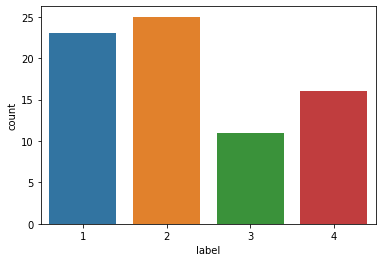

In [23]:
y = dataset["label"]

sns.countplot(y)


target_temp = dataset.label.value_counts()

print(target_temp)

In [24]:
target_temp

2    25
1    23
4    16
3    11
Name: label, dtype: int64

In [25]:
print("Percentage of Sad songs  : " +str(round(target_temp[1]*100/75,2)))
print("Percentage of happy songs : " +str(round(target_temp[2]*100/75,2)))
print("Percentage of Relax songs : " +str(round(target_temp[3]*100/75,2)))
print("Percentage of Angry songs : " +str(round(target_temp[4]*100/75,2)))

Percentage of Sad songs  : 30.67
Percentage of happy songs : 33.33
Percentage of Relax songs : 14.67
Percentage of Angry songs : 21.33


Train 

In [26]:
feature = dataset.loc[:, 'tempo':]
featureName = list(feature)

In [27]:
for name in featureName:
    feature[name] = (feature[name] - feature[name].min()) / (feature[name].max() - feature[name].min())

In [28]:
from sklearn.model_selection import train_test_split
target = dataset.loc[:, 'class'].dropna()
X_train,X_test,Y_train,Y_test = train_test_split(feature,target,test_size=0.20,random_state=0)

In [29]:
X_train.shape

(60, 54)

In [30]:
X_test.shape

(15, 54)

In [31]:
Y_train.shape

(60,)

In [32]:
Y_test.shape

(15,)

Model Fitting

In [33]:
from sklearn.metrics import accuracy_score

Logistic

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [35]:
Y_pred_lr.shape

(15,)

In [36]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 60.0 %


Naive BAyers

In [37]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [38]:
Y_pred_nb.shape

(15,)

In [39]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 40.0 %


SVM

In [40]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [41]:
Y_pred_svm.shape

(15,)

In [42]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 60.0 %


KNN


In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [44]:
Y_pred_knn.shape

(15,)

In [45]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 66.67 %


Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
print(Y_pred_dt.shape)


(15,)


In [47]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 46.67 %


Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

80.0
338


In [49]:
Y_pred_rf.shape

(15,)

In [50]:

score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 80.0 %


XGBoost

In [51]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

[14:15:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [52]:
Y_pred_xgb.shape


(15,)

In [53]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 53.33 %


In [54]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 60.0 %
The accuracy score achieved using Naive Bayes is: 40.0 %
The accuracy score achieved using Support Vector Machine is: 60.0 %
The accuracy score achieved using K-Nearest Neighbors is: 66.67 %
The accuracy score achieved using Decision Tree is: 46.67 %
The accuracy score achieved using Random Forest is: 80.0 %
The accuracy score achieved using XGBoost is: 53.33 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

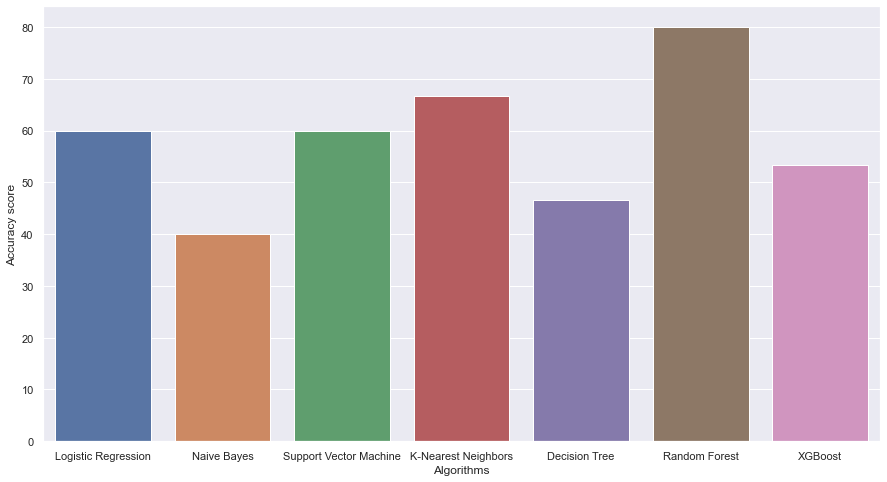

In [55]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)